In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [38]:
coin_gecko_16 = pd.read_csv('coin_gecko_2022-03-16.csv')
coin_gecko_17 = pd.read_csv('coin_gecko_2022-03-17.csv')

coin_gecko_16.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [4]:
coin_gecko_16.isnull().sum().sum(), coin_gecko_17.isnull().sum().sum()

(12, 17)

In [5]:
coin_gecko_17.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [40]:
# Merge the two datasets
coin_gecko = pd.concat([coin_gecko_16, coin_gecko_17], axis=0)
coin_gecko.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [7]:
coin_gecko.isna().sum().sum()

29

# Exploratory Data Analysis

## Data cleaning

In [8]:
coin_gecko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 78.1+ KB


In [9]:
coin_gecko.isna().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [41]:
# Handle missing values
def handle_missing_values(df, col):
    df[col].fillna(df[col].median(), inplace=True)
    return df

coin_gecko = handle_missing_values(coin_gecko, '1h')
coin_gecko = handle_missing_values(coin_gecko, '24h')
coin_gecko = handle_missing_values(coin_gecko, '7d')
coin_gecko = handle_missing_values(coin_gecko, '24h_volume')

coin_gecko.isna().sum().sum()

0

## Visualizations

In [13]:
# Market trends in the last 1h, 24h, 7days 
coin_gecko[['1h', '24h', '7d']].describe().T.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#000000'), ('color', 'white')]}])


,count,mean,std,min,25%,50%,75%,max
1h,1000.000000,0.009697,0.026842,-0.704000,0.001000,0.006000,0.019000,0.095000
24h,1000.000000,0.023683,0.059098,-0.646000,0.001000,0.016000,0.035000,0.577000
7d,1000.000000,0.023366,0.228869,-0.558000,-0.040250,-0.000500,0.036000,4.608000


* 1h column refers to the percentage change in the last 1 hour
* 24h column refers to the percentage change in the last 24 hours
* 7d column refers to the percentage change in the last 7 days

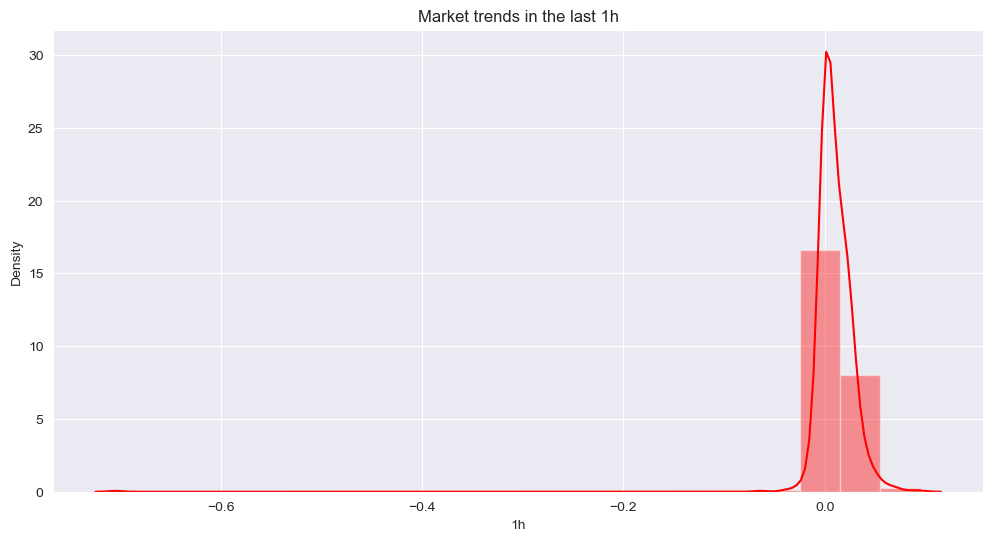

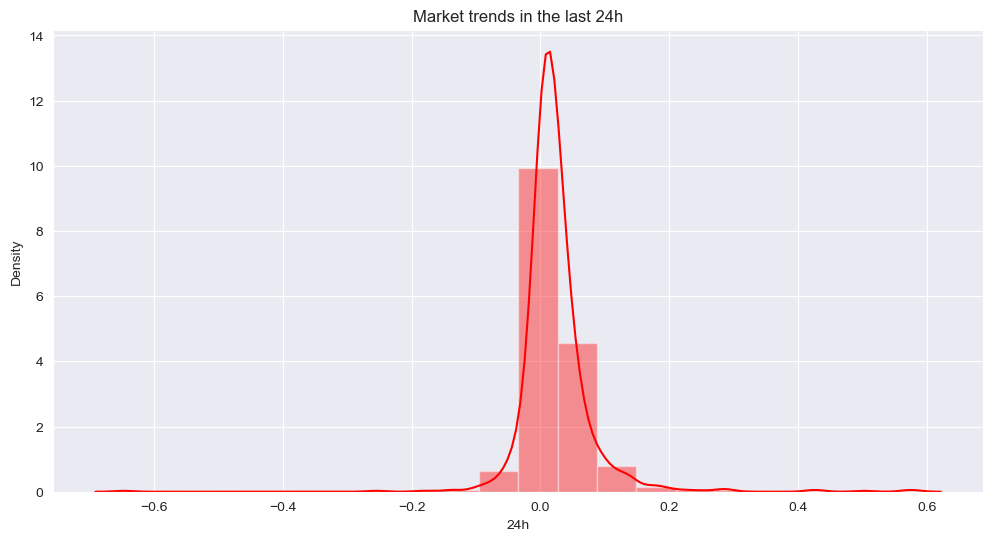

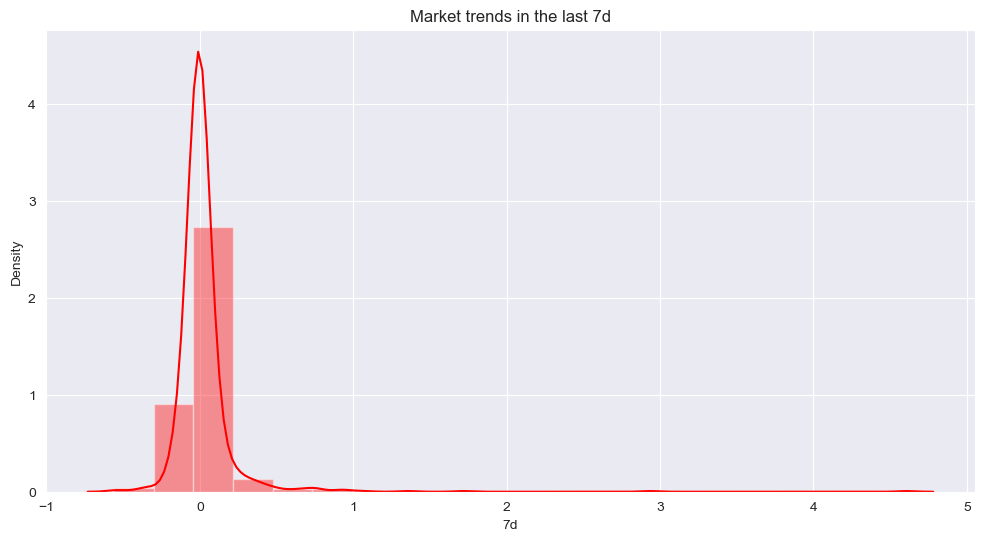

In [14]:
def plot_trends(df, col, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    sns.distplot(df[col], bins=20, color='red')
    plt.show()

plot_trends(coin_gecko, '1h', 'Market trends in the last 1h')
plot_trends(coin_gecko, '24h', 'Market trends in the last 24h')
plot_trends(coin_gecko, '7d', 'Market trends in the last 7d')

In [15]:
coin_gecko[['1h', '24h', '7d', 'price']].describe().T.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#000000'), ('color', 'white')]}])

,count,mean,std,min,25%,50%,75%,max
1h,1000.000000,0.009697,0.026842,-0.704000,0.001000,0.006000,0.019000,0.095000
24h,1000.000000,0.023683,0.059098,-0.646000,0.001000,0.016000,0.035000,0.577000
7d,1000.000000,0.023366,0.228869,-0.558000,-0.040250,-0.000500,0.036000,4.608000
price,1000.000000,656.105988,4584.654569,0.000000,0.194055,1.095000,7.232500,41217.270000


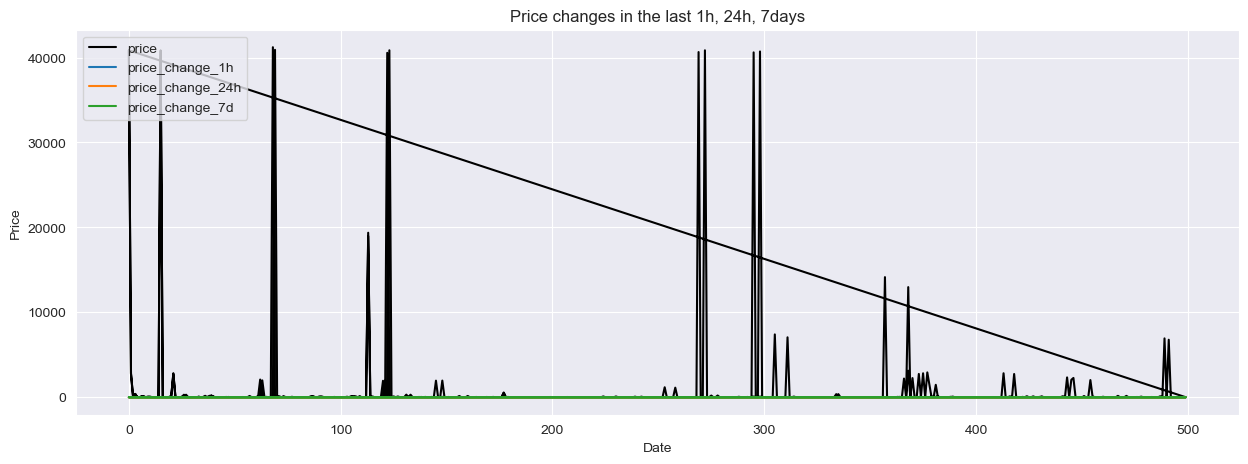

In [19]:
# Plot price changes in the last 1h, 24h, 7days 
fig, ax = plt.subplots(
    figsize=(15, 5),)
ax.plot(coin_gecko.index, coin_gecko['price'], label='price', color='black')
ax.plot(coin_gecko.index, coin_gecko['1h'],
        label='price_change_1h')    
ax.plot(coin_gecko.index, coin_gecko['24h'],
        label='price_change_24h')
ax.plot(coin_gecko.index, coin_gecko['7d'],
        label='price_change_7d')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price changes in the last 1h, 24h, 7days')
ax.legend(loc='upper left')
plt.show();

In [20]:
# Let's see the top 10 coins by market capitalization
top_10 = coin_gecko.sort_values(by='mkt_cap', ascending=False).head(10)
top_10

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


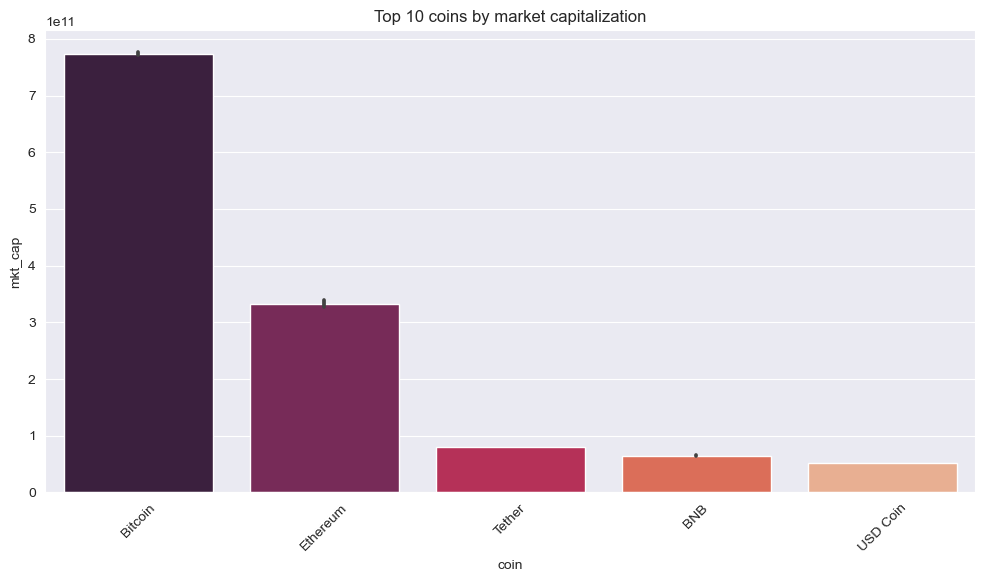

In [22]:
plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by market capitalization')
sns.barplot(x=top_10['coin'], y=top_10['mkt_cap'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

* Market cap is the total market value of a cryptocurrency's circulating supply. It is analogous to the free-float capitalization in the stock market. Market cap = Current Price x Circulating Supply.

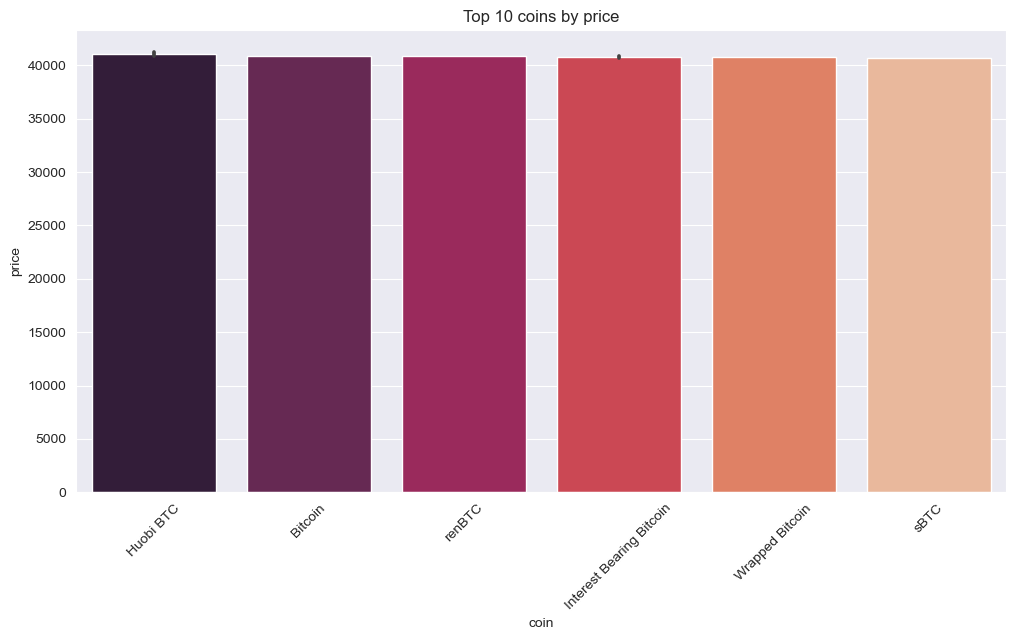

In [23]:
# Let's see the top 10 coins by price
top_10 = coin_gecko.sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by price')
sns.barplot(x=top_10['coin'], y=top_10['price'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

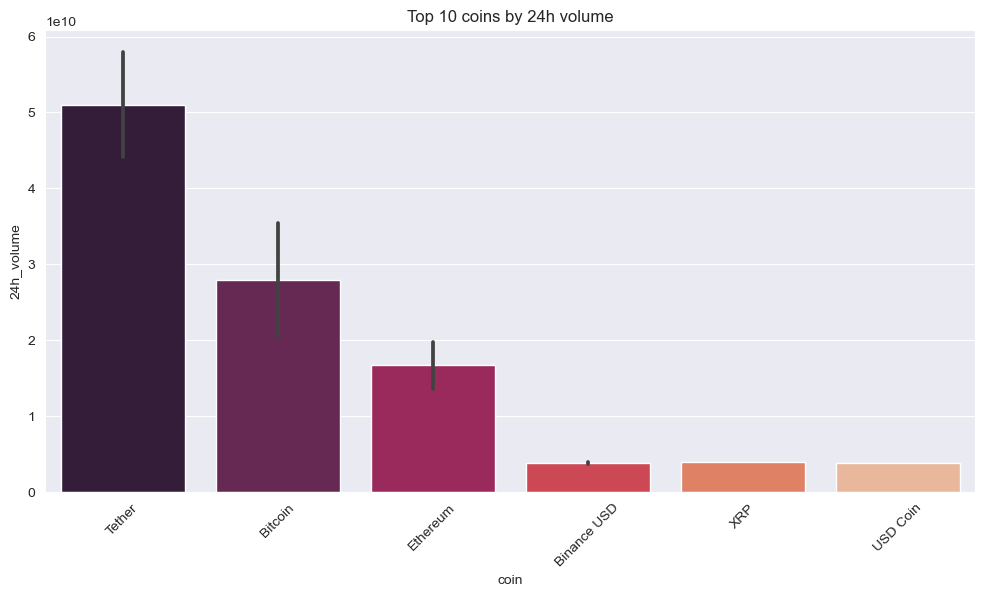

In [24]:
# Let's see the top 10 coins by 24h volume
top_10 = coin_gecko.sort_values(by='24h_volume', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by 24h volume')
sns.barplot(x=top_10['coin'], y=top_10['24h_volume'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

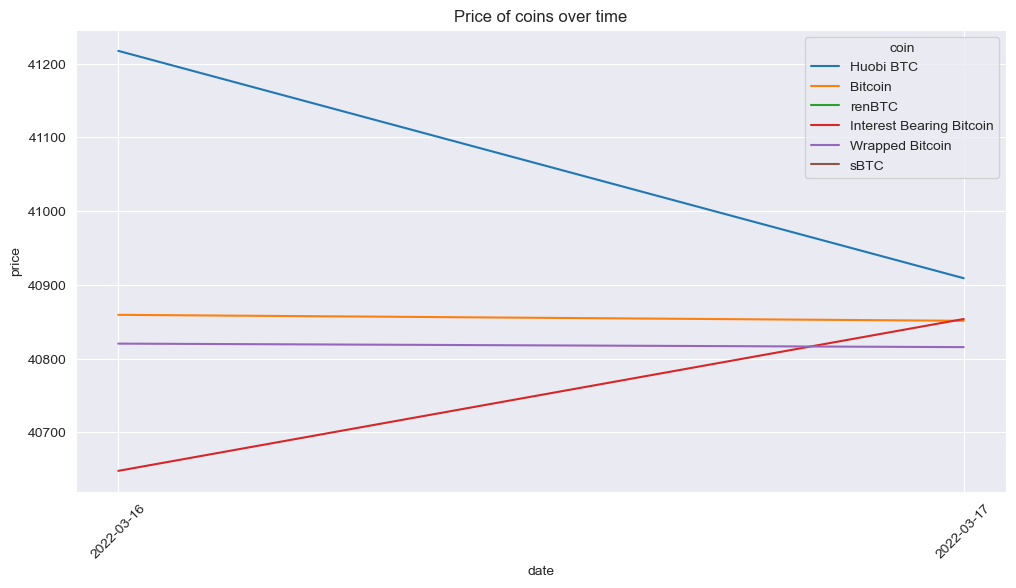

In [26]:
top_10 = coin_gecko.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.title('Price of coins over time')
sns.lineplot(x='date', y='price', hue='coin', data=top_10)
plt.xticks(rotation=45)
plt.show();

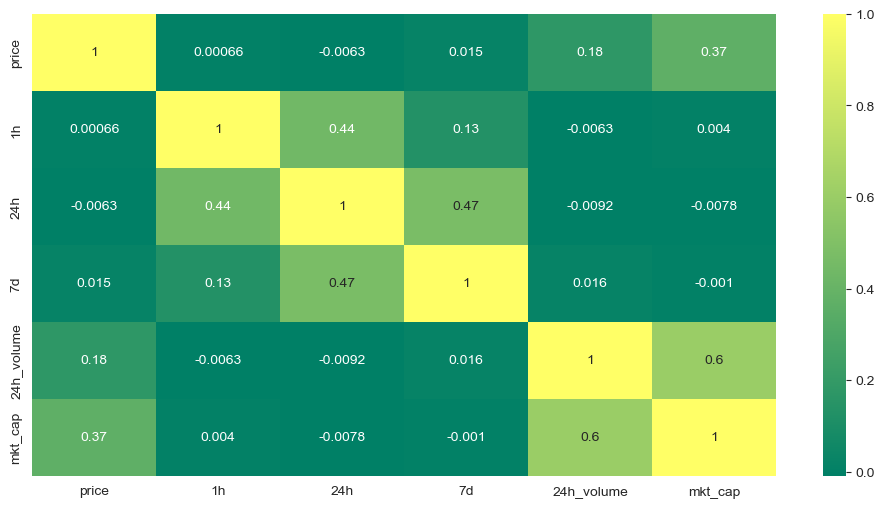

In [44]:
corr = coin_gecko.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='summer')
plt.show();

In [45]:
# coins with the highest correlation with price
corr['price'].sort_values(ascending=False).head(10)

price         1.000000
mkt_cap       0.366709
24h_volume    0.175982
7d            0.015359
1h            0.000657
24h          -0.006281
Name: price, dtype: float64

In [46]:
# Since 1h , 24h and 7d are pct changes, we will use the pct_change() method to calculate the pct change of the price
coin_gecko['price_pct_change'] = coin_gecko['price'].pct_change()
coin_gecko['mkt_cap_pct_change'] = coin_gecko['mkt_cap'].pct_change()
coin_gecko['24h_volume_pct_change'] = coin_gecko['24h_volume'].pct_change()

coin_gecko.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,price_pct_change,mkt_cap_pct_change,24h_volume_pct_change
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,NaN,NaN,NaN
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,-0.932833,-0.575735,-0.441982
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,-0.999636,-0.755536,1.933610
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,382.430000,-0.199103,-0.975907
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,-0.997392,-0.184587,1.774125


In [47]:
corr = coin_gecko.corr()

corr['price'].sort_values(ascending=False).head(10)

price                    1.000000
mkt_cap                  0.366709
mkt_cap_pct_change       0.289164
24h_volume               0.175982
price_pct_change         0.046361
7d                       0.015359
24h_volume_pct_change    0.004433
1h                       0.000657
24h                     -0.006281
Name: price, dtype: float64

In [48]:
# Creating synthetic features
coin_gecko['price_mkt_cap_ratio'] = coin_gecko['price'] / coin_gecko['mkt_cap']
coin_gecko['price_24h_volume_ratio'] = coin_gecko['price'] / coin_gecko['24h_volume']
coin_gecko['mkt_cap_24h_volume_ratio'] = coin_gecko['mkt_cap'] / coin_gecko['24h_volume']

corr = coin_gecko.corr()
corr['price'].sort_values(ascending=False).head(10)

price                     1.000000
price_mkt_cap_ratio       0.666489
mkt_cap                   0.366709
mkt_cap_pct_change        0.289164
price_24h_volume_ratio    0.283842
24h_volume                0.175982
price_pct_change          0.046361
7d                        0.015359
24h_volume_pct_change     0.004433
1h                        0.000657
Name: price, dtype: float64

In [49]:
# Extracting the month and year from the date column
coin_gecko['month'] = pd.DatetimeIndex(coin_gecko['date']).month
coin_gecko['year'] = pd.DatetimeIndex(coin_gecko['date']).year
coin_gecko['day'] = pd.DatetimeIndex(coin_gecko['date']).day

corr = coin_gecko.corr()
corr['price'].sort_values(ascending=False).head(10)

price                     1.000000
price_mkt_cap_ratio       0.666489
mkt_cap                   0.366709
mkt_cap_pct_change        0.289164
price_24h_volume_ratio    0.283842
24h_volume                0.175982
price_pct_change          0.046361
7d                        0.015359
24h_volume_pct_change     0.004433
day                       0.000725
Name: price, dtype: float64

In [50]:
# Adding seasonality features
coin_gecko['season'] = coin_gecko['month'].apply(lambda x: 'winter' if x in [12, 1, 2] else ('spring' if x in [3, 4, 5] else ('summer' if x in [6, 7, 8] else 'autumn')))
coin_gecko['season'] = coin_gecko['season'].astype('category')

coin_gecko['season'].value_counts()

spring    1000
Name: season, dtype: int64

In [52]:
# circulating supply
coin_gecko['circulating_supply'] = coin_gecko['mkt_cap'] / coin_gecko['price']

# volume to market cap ratio
coin_gecko['volume_to_mkt_cap_ratio'] = coin_gecko['24h_volume'] / coin_gecko['mkt_cap']

# price to volume ratio
coin_gecko['price_to_volume_ratio'] = coin_gecko['price'] / coin_gecko['24h_volume']

# price to circulating supply ratio
coin_gecko['price_to_circulating_supply_ratio'] = coin_gecko['price'] / coin_gecko['circulating_supply']

corr = coin_gecko.corr()

corr['price'].sort_values(ascending=False).head(10)

price                                1.000000
price_to_circulating_supply_ratio    0.673477
price_mkt_cap_ratio                  0.666489
mkt_cap                              0.366709
mkt_cap_pct_change                   0.289164
price_24h_volume_ratio               0.283842
price_to_volume_ratio                0.283842
24h_volume                           0.175982
price_pct_change                     0.046361
7d                                   0.015359
Name: price, dtype: float64

In [54]:
coin_gecko['open'] = coin_gecko['price'] / (1 + coin_gecko['price_pct_change'])
coin_gecko['24h_pct_change'] = coin_gecko['price_pct_change'] * 24
coin_gecko['high'] = coin_gecko['open'] + (coin_gecko['open'] * coin_gecko['24h_pct_change'])
coin_gecko['low'] = coin_gecko['open'] - (coin_gecko['open'] * coin_gecko['24h_pct_change'])

corr = coin_gecko.corr()
corr['price'].sort_values(ascending=False).head(10)

price                                1.000000
high                                 0.710641
price_to_circulating_supply_ratio    0.673477
price_mkt_cap_ratio                  0.666489
mkt_cap                              0.366709
mkt_cap_pct_change                   0.289164
price_to_volume_ratio                0.283842
price_24h_volume_ratio               0.283842
24h_volume                           0.175982
24h_pct_change                       0.046361
Name: price, dtype: float64

In [55]:
coin_gecko['30d'] = coin_gecko['price'].rolling(window=30).mean()
coin_gecko['60d'] = coin_gecko['price'].rolling(window=60).mean()
coin_gecko['90d'] = coin_gecko['price'].rolling(window=90).mean()

coin_gecko['30d_pct_change'] = coin_gecko['30d'].pct_change()
coin_gecko['60d_pct_change'] = coin_gecko['60d'].pct_change()
coin_gecko['90d_pct_change'] = coin_gecko['90d'].pct_change()

coin_gecko['30d_pct_change'] = coin_gecko['30d_pct_change'] * 30
coin_gecko['60d_pct_change'] = coin_gecko['60d_pct_change'] * 60
coin_gecko['90d_pct_change'] = coin_gecko['90d_pct_change'] * 90

coin_gecko['30d_high'] = coin_gecko['30d'] + coin_gecko['30d_pct_change']
coin_gecko['30d_low'] = coin_gecko['30d'] - coin_gecko['30d_pct_change']

coin_gecko['60d_high'] = coin_gecko['60d'] + coin_gecko['60d_pct_change']
coin_gecko['60d_low'] = coin_gecko['60d'] - coin_gecko['60d_pct_change']

coin_gecko['90d_high'] = coin_gecko['90d'] + coin_gecko['90d_pct_change']
coin_gecko['90d_low'] = coin_gecko['90d'] - coin_gecko['90d_pct_change']

corr = coin_gecko.corr()
corr['price'].sort_values(ascending=False).head(10)

price                                1.000000
high                                 0.710641
price_to_circulating_supply_ratio    0.673477
price_mkt_cap_ratio                  0.666489
30d_pct_change                       0.545437
90d_pct_change                       0.511194
60d_pct_change                       0.498255
mkt_cap                              0.366709
mkt_cap_pct_change                   0.289164
price_24h_volume_ratio               0.283842
Name: price, dtype: float64

In [56]:
# Obtain high correlated features with price ver 0.5
high_corr_features = corr['price'][corr['price'] > 0.5].index.tolist()
high_corr_features.remove('price')
high_corr_features


['price_mkt_cap_ratio',
 'price_to_circulating_supply_ratio',
 'high',
 '30d_pct_change',
 '90d_pct_change']

# Model Building

In [66]:
X = coin_gecko[high_corr_features]
y = coin_gecko['price']

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

print('Mean squared error: %.2f'
        % mean_squared_error(y_test, rf_y_pred))
print('Mean absolute error: %.2f'
        % mean_absolute_error(y_test, rf_y_pred))
print('Coefficient of determination: %.2f'
        % r2_score(y_test, rf_y_pred))


Mean squared error: 123127.46
Mean absolute error: 41.90
Coefficient of determination: 0.94


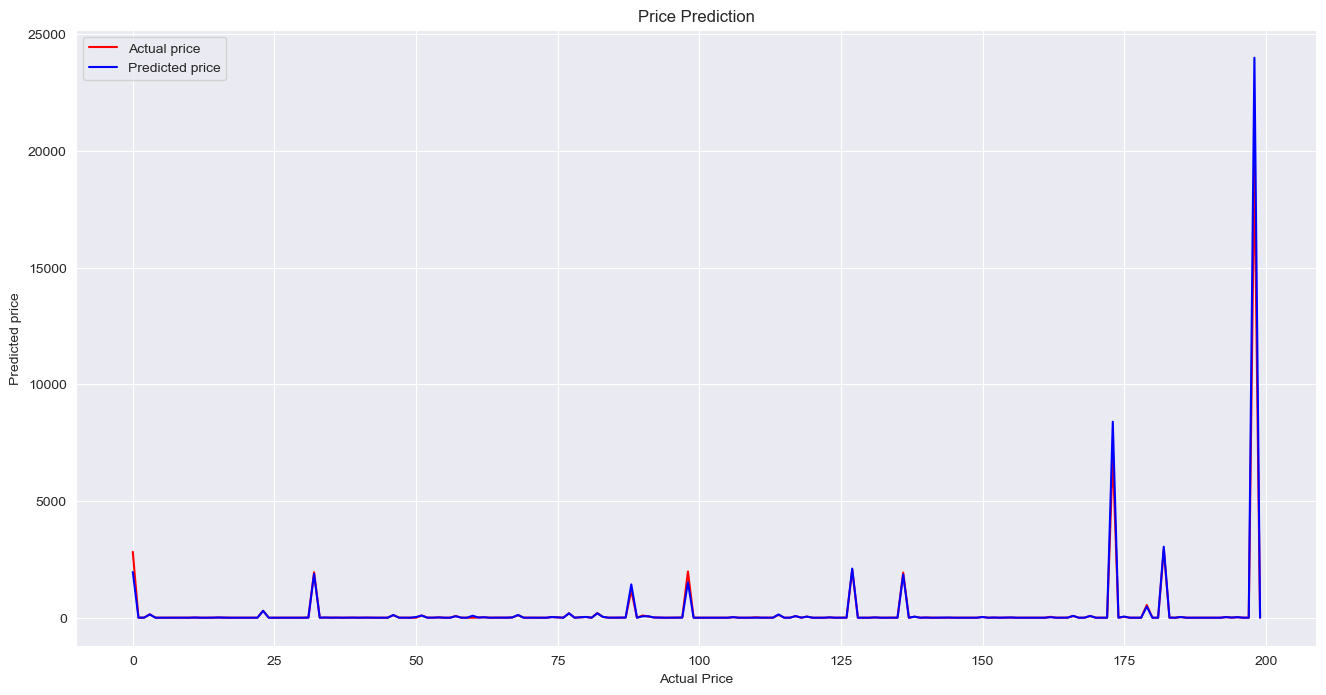

In [67]:
# Visualising the results
plt.figure(figsize=(16, 8))
plt.plot(y_test.values, color='red', label='Actual price')
plt.plot(rf_y_pred, color='blue', label='Predicted price')
plt.title('Price Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.legend();

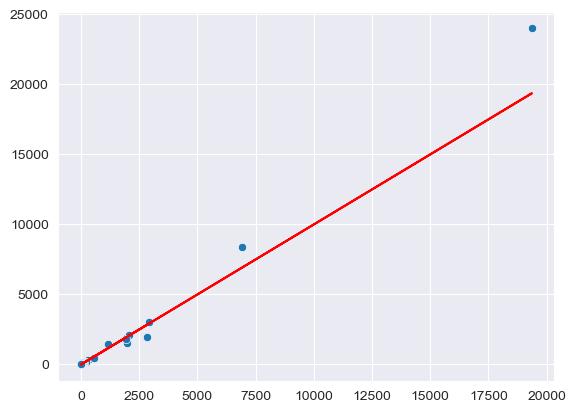

In [68]:
sns.scatterplot(x=y_test.values, y=rf_y_pred)
plt.plot(y_test.values, y_test.values, color='red');

In [61]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)


,feature,importance
2,high,0.973454
1,price_to_circulating_supply_ratio,0.017738
0,price_mkt_cap_ratio,0.006727
3,30d_pct_change,0.001573
4,90d_pct_change,0.000509


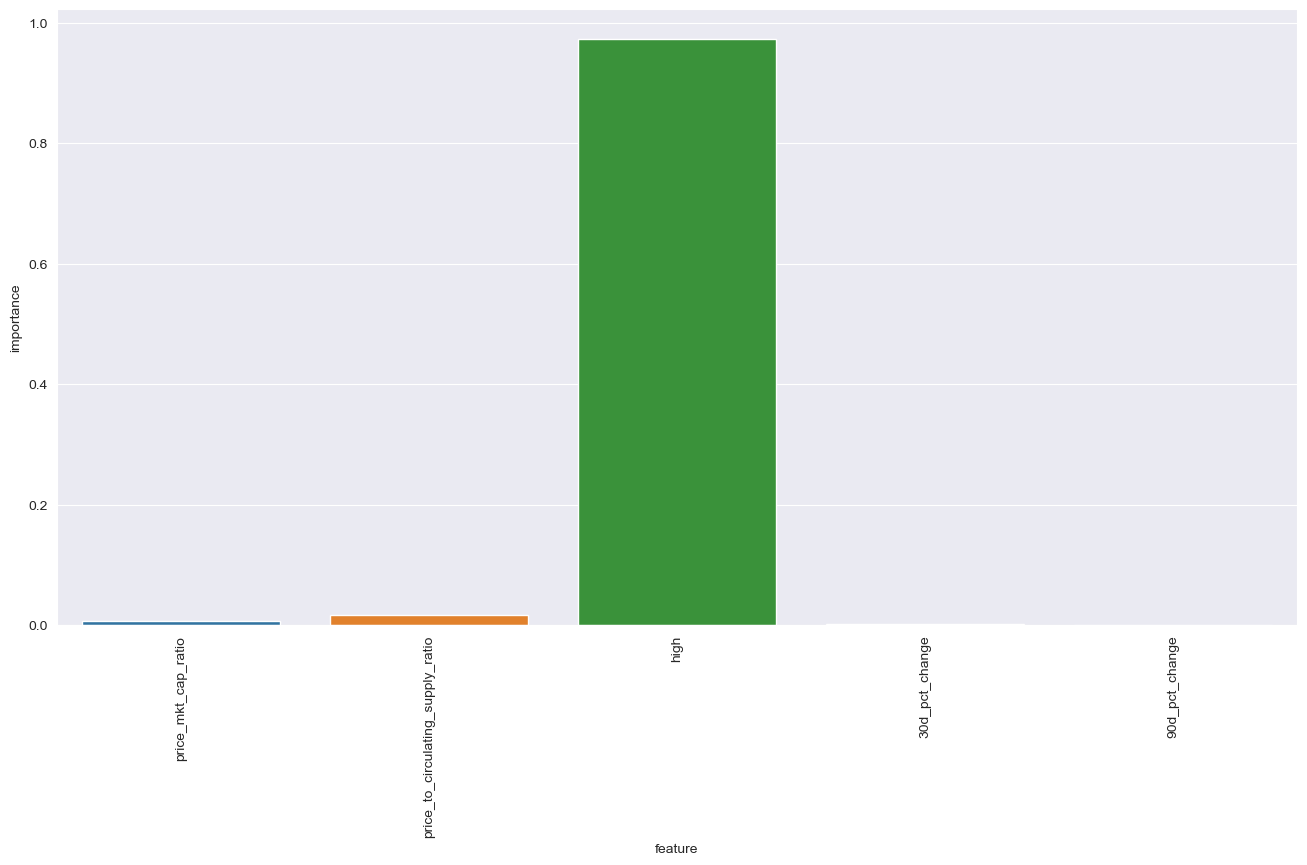

In [62]:
# Plotting feature importance
plt.figure(figsize=(16, 8))
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.xticks(rotation=90);

In [69]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)

xg_y_pred = xg.predict(X_test)

print('Mean squared error: %.2f'% mean_squared_error(y_test, xg_y_pred))
print('Mean absolute error: %.2f'% mean_absolute_error(y_test, xg_y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, xg_y_pred))

Mean squared error: 2150934.42
Mean absolute error: 110.35
Coefficient of determination: 0.04


In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)

print('Mean squared error: %.2f'% mean_squared_error(y_test, lr_y_pred))
print('Mean absolute error: %.2f'% mean_absolute_error(y_test, lr_y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, lr_y_pred))

Mean squared error: 3838607.49
Mean absolute error: 1348.03
Coefficient of determination: -0.72


# Time Series Analysis

* Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series data means that data is in a series of particular time periods or intervals. The data is considered in three types:
    - Time series data: A set of observations on the values that a variable takes at different times.
    - Cross-sectional data: Data of one or more variables, collected at the same point in time.
    - Pooled data: A combination of time series data and cross-sectional data.

    * Time series analysis helps to:
    - Forecast future values: Time series analysis uses past data to forecast future values. Businesses use it to predict inventory levels and future sales.
    - Understand the relationship between variables: Time series analysis can help to understand how a variable changes over time. For example, it can help to determine if advertising expenses and sales revenue are related.
    - Estimate the impact of a particular factor: Time series analysis can help to understand the impact of a one-time event on the variable. For example, if a business wants to know the impact of a marketing campaign on sales revenue, time series analysis can help to estimate it.

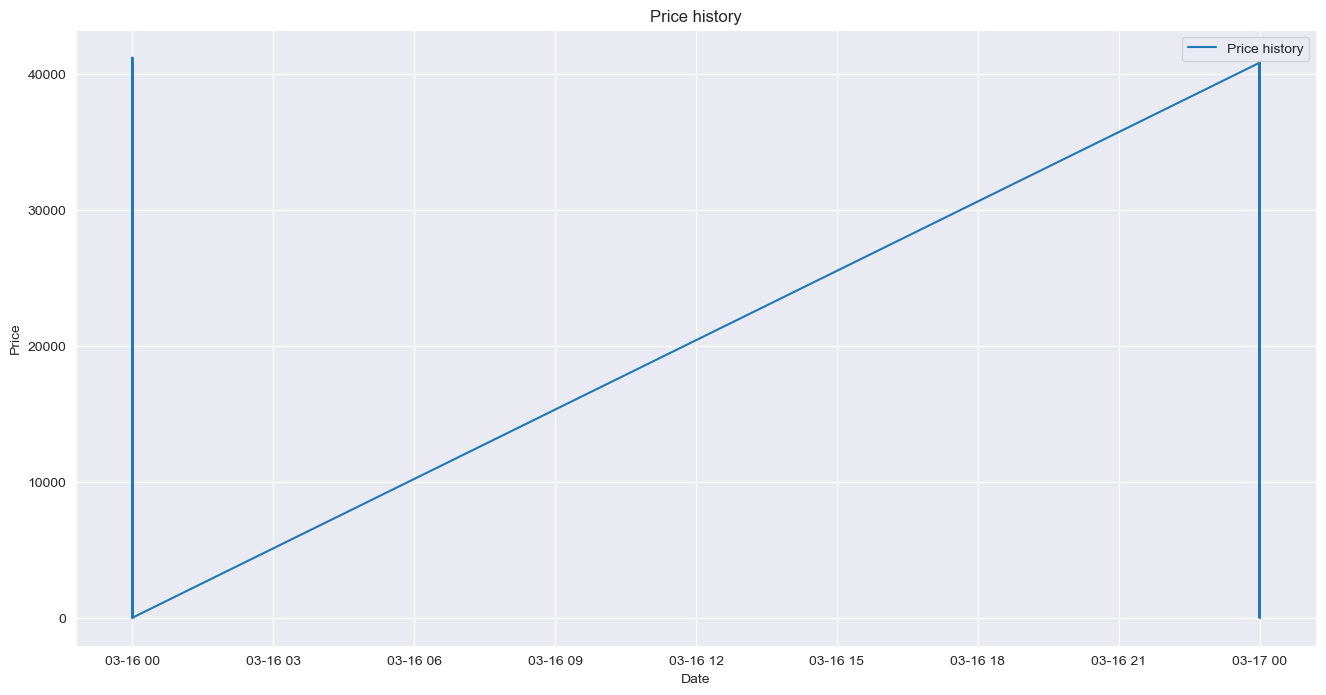

In [72]:
# Time series forecasting
coin_gecko['date'] = pd.to_datetime(coin_gecko['date'])
coin_gecko.set_index('date', inplace=True)

# Plotting the time series
plt.figure(figsize=(16, 8))
plt.plot(coin_gecko['price'], label='Price history')
plt.title('Price history')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();

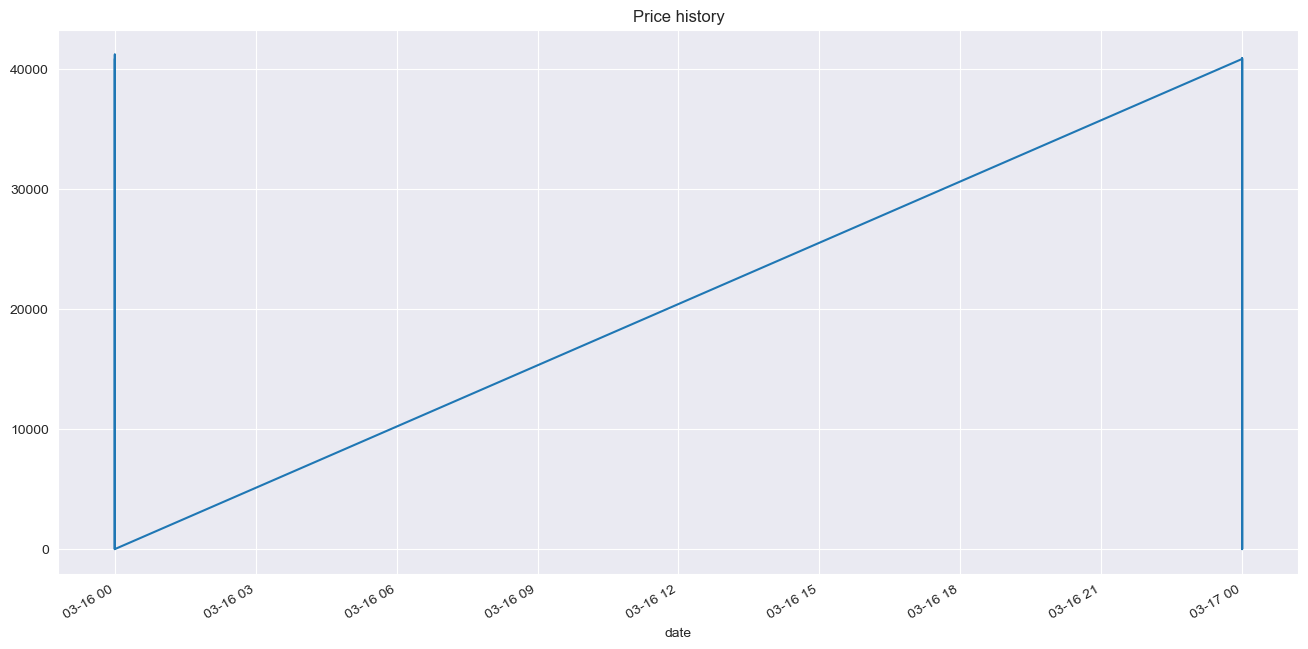

In [73]:
coin_gecko['price'].plot(figsize=(16, 8), title='Price history');

In [74]:
coin_gecko.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,price_pct_change,mkt_cap_pct_change,...,90d,30d_pct_change,60d_pct_change,90d_pct_change,30d_high,30d_low,60d_high,60d_low,90d_high,90d_low
date,,,,,,,,,,,,,,,,,,,,,
2022-03-16,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-16,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,-0.932833,-0.575735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-16,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,-0.999636,-0.755536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-16,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,382.430000,-0.199103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-16,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,-0.997392,-0.184587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


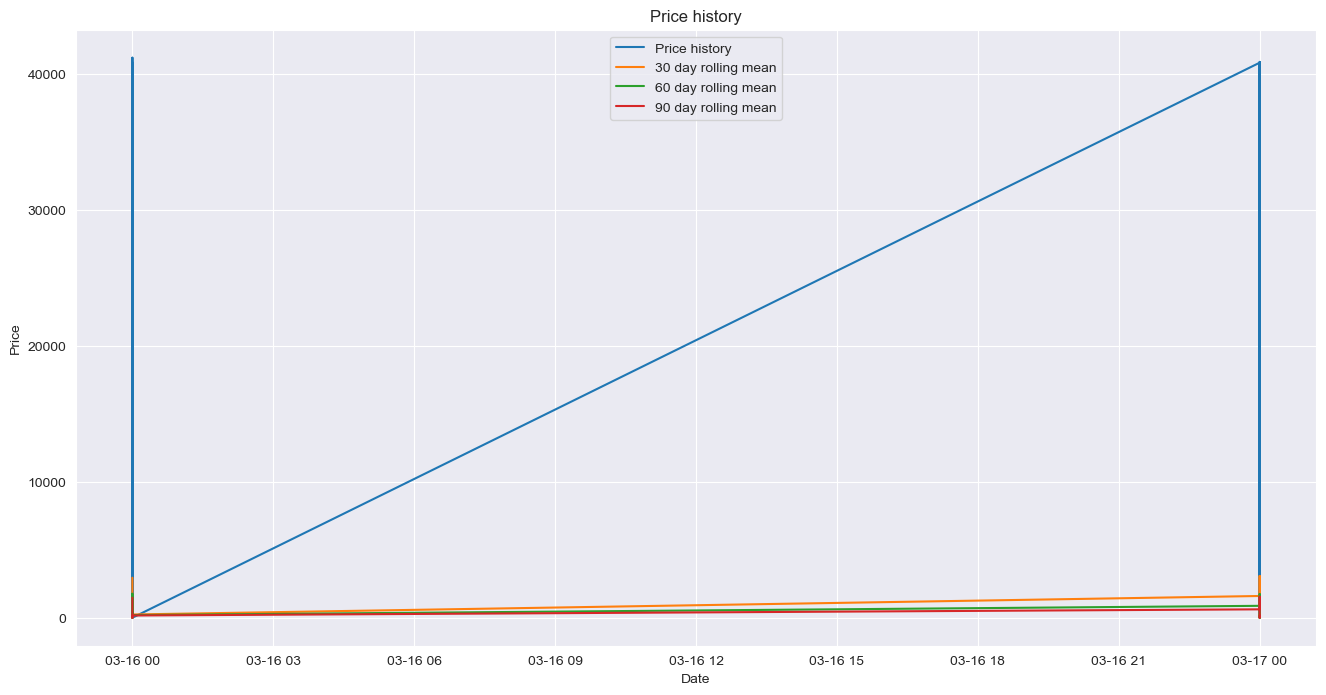

In [75]:
# Plotting the rolling mean
plt.figure(figsize=(16, 8))
plt.plot(coin_gecko['price'], label='Price history')
plt.plot(coin_gecko['price'].rolling(window=30).mean(), label='30 day rolling mean')
plt.plot(coin_gecko['price'].rolling(window=60).mean(), label='60 day rolling mean')
plt.plot(coin_gecko['price'].rolling(window=90).mean(), label='90 day rolling mean')
plt.title('Price history')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();

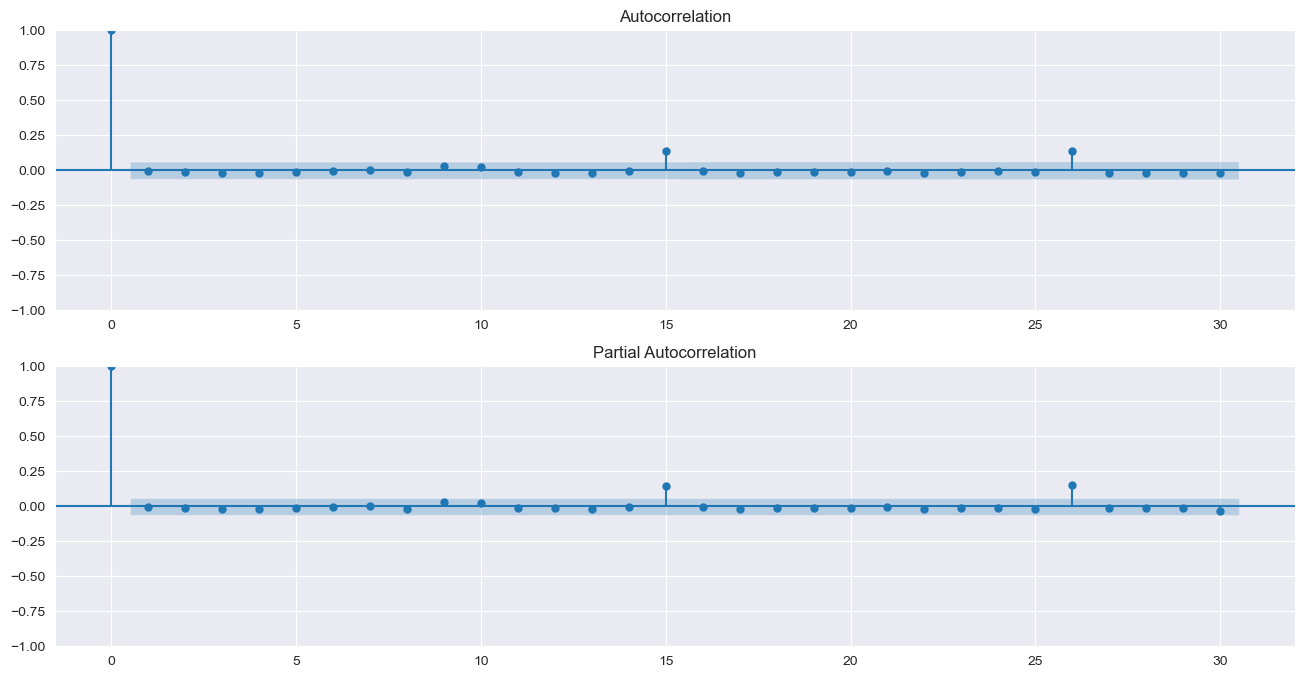

In [77]:

# add title
def add_title(ax, title):
    ax.set_title(title, fontsize=14, fontweight='bold')
    return ax

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotting the ACF and PACF
fig, ax = plt.subplots(2, figsize=(16, 8))
add_title(ax[0], 'Autocorrelation')
add_title(ax[1], 'Partial Autocorrelation')
plot_acf(coin_gecko['price'], lags=30, ax=ax[0])
plot_pacf(coin_gecko['price'], lags=30, ax=ax[1])
plt.show();


* Decomposition of time series data refers to breaking down of time series data into its components: trend, seasonality, and remainder. It is used to help understand the pattern in the time series data. It can help to answer questions such as:
    - What is the average value of the time series?
    - Is the time series increasing or decreasing?
    - Is the time series affected by seasonality?
    - Is the trend linear or non-linear?
    - Is there any unusual observation (outliers) in the time series?

<Figure size 640x480 with 0 Axes>

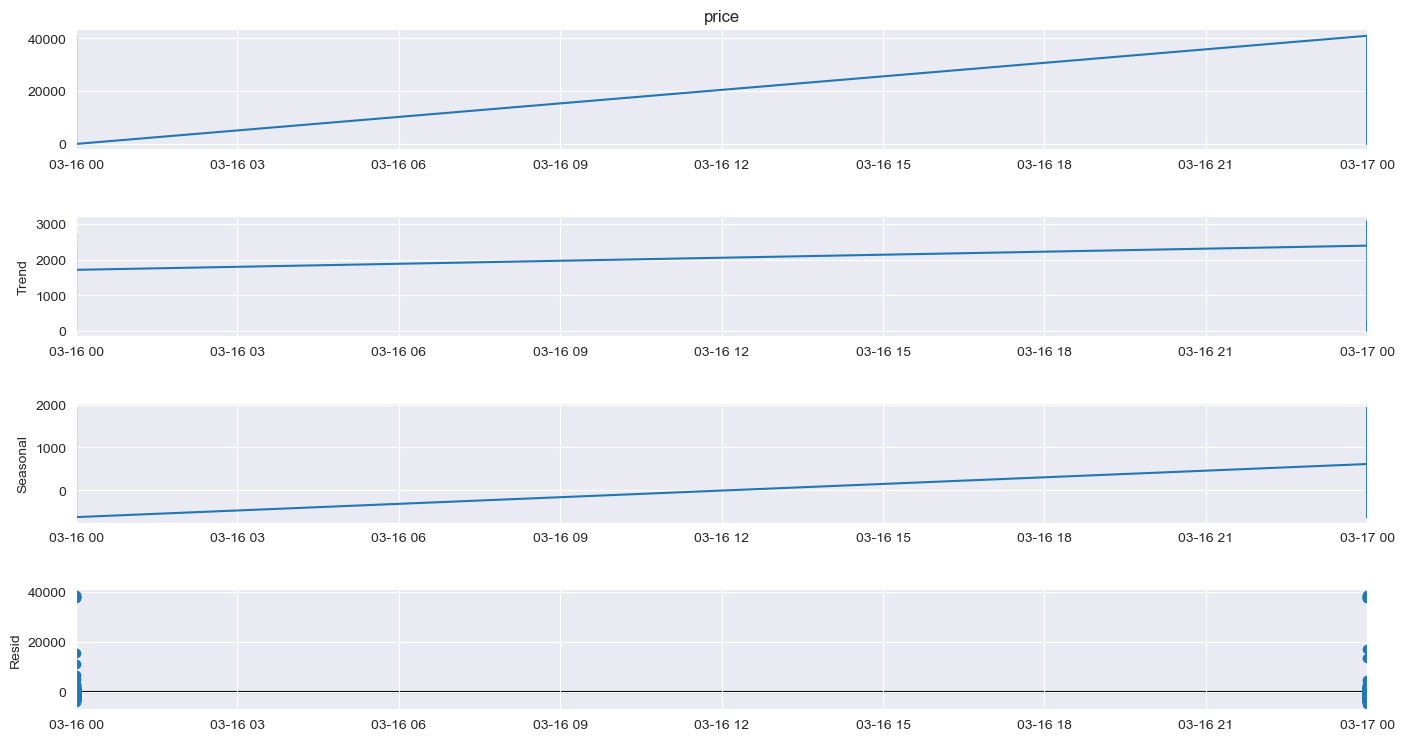

In [79]:
# Decomposing the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(coin_gecko['price'], period=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(16, 8)